In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import walk
from matplotlib.pyplot import cm 

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [11]:
df = pd.read_csv('../src/tests/sintonizar ks/lane_states_-180_.78070.log', skiprows=1, sep='\t')

In [83]:
df.head()

,num_execution,Est_0,Est_1,Est_2,Est_3,Est_4,Est_5,Est_6,Est_7,Est_8,...,delta_predicted_y,delta_predicted_theta,pos_odom_x,pos_odom_y,pos_odom_theta,delta_odom_x,delta_odom_y,delta_odom_theta,delta_time,cte
0,15,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.2,-0.70000
1,15,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.70000
2,15,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.2,0.05014
3,15,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.2,0.05014
4,15,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.2,0.05014


In [12]:
df = df[df.cte.map(is_number)]

In [14]:
df['cte'].map(float).sum()

-6.278609999999998

In [81]:
df['cte'].apply(lambda x: if x != '-': float(x) else 0).sum()

SyntaxError: invalid syntax (<ipython-input-81-946a20b2e4aa>, line 1)

In [73]:
df['cte'].apply(lambda x:np.power(x,2)).mean()

0.005154625142569266

In [74]:
path = '../src/tests/sintonizar ks/'

# f = []
for (dirpath, dirnames, filenames) in walk(path):
    for f in filenames:
        if '.log' in f:
            # print(f)
            
            # get ks from filename
            ks=f[17:-4]
            
            split_index = ks.find('.') + 5
            
            k1 = ks[:split_index]
            k2 = ks[split_index:]
            
            print (f, k1,k2)
    break

lane_states_-180_.77190.log .7719 0
lane_states_-180_.8910-.0810.log .8910 -.0810
lane_states_-180_.85630.log .8563 0
lane_states_-180_.72180.log .7218 0
lane_states_-180_1.10000.1000.log 1.1000 0.1000
lane_states_-180_.72900.log .7290 0
lane_states_-180_.7859.0386.log .7859 .0386
lane_states_-180_.71510.log .7151 0
lane_states_-180_.7859-.0386.log .7859 -.0386
lane_states_-180_1.10000.log 1.1000 0
lane_states_-180_.71290.log .7129 0
lane_states_-180_.8019-.0729.log .8019 -.0729
lane_states_-180_.76810.log .7681 0
lane_states_-180_.71890.log .7189 0
lane_states_-180_.71040.log .7104 0
lane_states_-180_.7859.0429.log .7859 .0429
lane_states_-180_.8730-.0531.log .8730 -.0531
lane_states_-180_.7938.0590.log .7938 .0590
lane_states_-180_.7347-.0280.log .7347 -.0280
lane_states_-180_.7347.0203.log .7347 .0203
lane_states_-180_.7218.0656.log .7218 .0656
lane_states_-180_.7859.0312.log .7859 .0312
lane_states_-180_.7347.0252.log .7347 .0252
lane_states_-180_.75430.log .7543 0
lane_states_-180

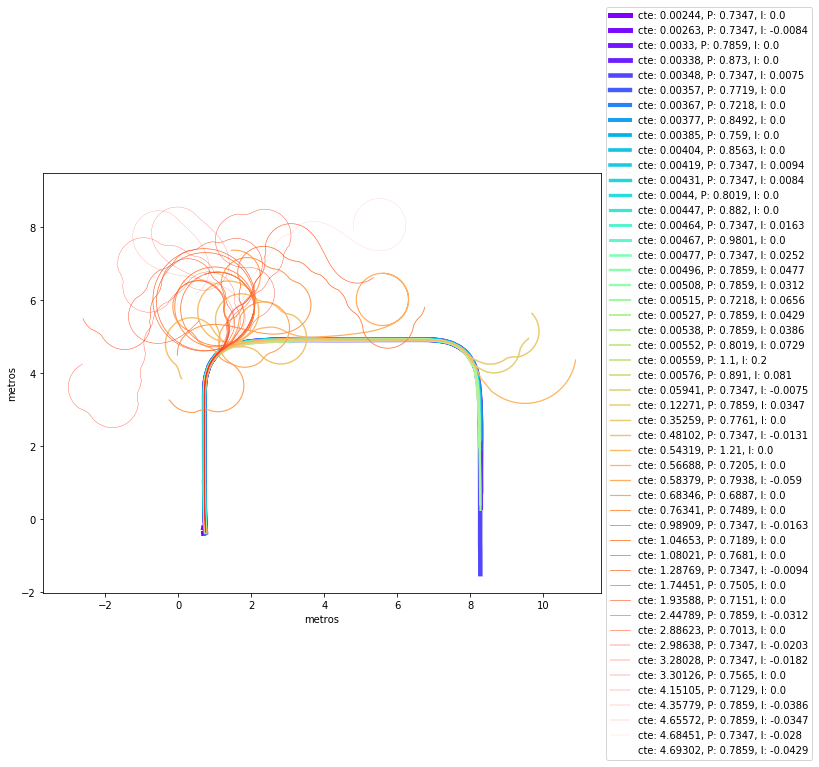

In [35]:
# revision navegación por estima
inicio = 2
fin = 1500

plt.figure(figsize=(10, 10))

# plt.title("Posición con odometría")
ax = plt.subplot(1,1,1)


path = '../src/tests/sintonizar ks/'



    
data = []

for (dirpath, dirnames, filenames) in walk(path):
    for f in filenames:
        if '.log' in f:
            df = pd.read_csv(path + f, skiprows=1, sep='\t')
            df = df[df.cte.map(is_number)]
            # print(f, df['cte'].map(float).sum())
            cte = df['cte'].apply(lambda x:np.power(float(x), 2)).mean()
            width = 18 - cte
            porcentaje = (width/18)*1.5
            
            ks=f[17:-4]
            
            split_index = ks.find('.') + 5
            
            p = ks[:split_index]
            i = ks[split_index:]
            
            if (cte < 5):
            
                data.append([cte, p, i, porcentaje, df])
    break

def get_first_elem(iterable):
    # print (iterable[0])
    return iterable[0]

# import cycler
#ax.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k']) +
#                  cycler('lw', [1, 2, 3, 4]))


color=iter(cm.rainbow(np.linspace(0,1,len(data))))
data_sorted = sorted(data, key=get_first_elem)

size = np.linspace(0,5,len(data))
size_decreasing = size[::-1]

cte_prev = 0
idx = 0
for l in data_sorted:
    #color='cyan', \
    c = next(color)
    
    if (round(l[0],4) != round(cte_prev,4)):
        ax.plot(l[4]['global_x'].values[inicio:fin] , \
                     l[4]['global_y'].values[inicio:fin] - 0.36, \
                     linewidth=size_decreasing[idx], linestyle='-', c=c, \
                     label="cte: {}, P: {}, I: {}".format(round(l[0],5), float(l[1]), float(l[2])))
    cte_prev = l[0]
    idx += 1

ax.set_aspect('equal')

ax.set_xlabel('metros')
ax.set_ylabel('metros')

#handles, labels = ax.get_legend_handles_labels()
#def get_second_elem(iterable):
#    return float(iterable[1][5:iterable[1].find(',')])

# or sort them by labels
#import operator
#hl = sorted(zip(handles, labels),
#            key=get_second_elem)
#handles2, labels2 = zip(*hl)

#ax.legend(handles2, labels2, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# a la derecha
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# legend at bottom
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)

plt.show()